In [1]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from requests.compat import urljoin, urlparse, unquote
from bs4 import BeautifulSoup
import re
import pandas as pd

#Парсинг отзывов первого магазина WhyNotFlowers
url_1 = "https://yandex.ru/maps/org/why_not_flowers/61726991025/reviews/?ll=37.593134%2C55.765479&z=16"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
    "Referer": "https://yandex.ru/maps/",  #заголовки взяты из deepseek, чтобы сайт не выдавал капчу
}
html_1 = requests.get(url_1, headers=headers).text

soup=BeautifulSoup(html_1, "html.parser")

review_blocks_1 = soup.findAll('span', class_='business-review-view__body-text')
reviews_1 = [review.get_text(strip=True) for review in review_blocks_1]

names_blocks_1 = soup.findAll('span', itemprop="name", dir="auto")
names_1 = [name.get_text(strip=True) for name in names_blocks_1]

data_why_not = pd.DataFrame([names_1, reviews_1])

#Парсинг отзывов второго магазина FlowersLowers
url_2 = "https://yandex.ru/maps/org/flowers_lovers/203271761188/reviews/?ll=37.630046%2C55.789294&z=16"

html_2 = requests.get(url_2, headers=headers).text
soup_2=BeautifulSoup(html_2, "html.parser")

review_blocks_2 = soup_2.find_all('span', class_='business-review-view__body-text')
reviews_2 = [review.get_text(strip=True) for review in review_blocks_2]

names_blocks_2 = soup_2.find_all('span', itemprop="name", dir="auto")
names_2 = [name.get_text(strip=True) for name in names_blocks_2]

data_lovers = pd.DataFrame([names_2, reviews_2])

<ipython-input-1-4beba5943549>:19: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  review_blocks_1 = soup.findAll('span', class_='business-review-view__body-text')
<ipython-input-1-4beba5943549>:22: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  names_blocks_1 = soup.findAll('span', itemprop="name", dir="auto")


In [2]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from requests.compat import urljoin, urlparse, unquote
from bs4 import BeautifulSoup
import re
import pandas as pd

#Парсинг отзывов первого магазина Расцветай
url_3 = "https://yandex.ru/maps/org/rastsvetay/220701587281/reviews/?ll=37.582766%2C55.762583&z=21"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
    "Referer": "https://yandex.ru/maps/",  # заголовки взяты из deepseek, чтобы сайт не выдавал капчу
}
html_3 = requests.get(url_3, headers=headers).text

soup=BeautifulSoup(html_3, "html.parser")

review_blocks_3 = soup.findAll('span', class_='business-review-view__body-text')
reviews_3 = [review.get_text(strip=True) for review in review_blocks_3]

names_blocks_3 = soup.findAll('span', itemprop="name", dir="auto")
names_3 = [name.get_text(strip=True) for name in names_blocks_3]

data_rascvetai = pd.DataFrame([names_3, reviews_3])


<ipython-input-2-10e95fe83e22>:24: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  review_blocks_3 = soup.findAll('span', class_='business-review-view__body-text')
<ipython-input-2-10e95fe83e22>:27: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  names_blocks_3 = soup.findAll('span', itemprop="name", dir="auto")


In [3]:
data_rascvetai = pd.DataFrame([names_3, reviews_3])

In [4]:
pip install gender-guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 8.8 MB/s eta 0:00:00


In [5]:
pip install transliterate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00


In [6]:
import gender_guesser.detector as gender
from transliterate import translit
import matplotlib.pyplot as plt
import seaborn as sns

detector = gender.Detector()

class TargAudience:
    def __init__(self, df, name):
        self.df=df
        self.name=name

    def sexes(self):
       men = 0
       women = 0
       for i in range(len(self.df.columns)):
          name=translit(str(self.df.iloc[0][i]).split(" ")[0], 'ru', reversed=True).capitalize()
          name = name.replace("'j", "i")
          name = name.replace("'", "")
          result = detector.get_gender(name)
          if result == "female" or result == "mostly_female":
            women+=1
          elif result == "male" or result == "mostly_male":
            men+=1
       proportion_w = women/len(self.df.columns)
       proportion_m = men/len(self.df.columns)
       return [men, women, proportion_m, proportion_w]

    def sexes_to_data(self):
      sexes_list = []
      for i in range(len(self.df.columns)):
        name=translit(str(self.df.iloc[0][i]).split(" ")[0], 'ru', reversed=True).capitalize()
        name = name.replace("'j", "i")
        name = name.replace("'", "")
        result = detector.get_gender(name)
        if result == "female" or result == "mostly_female":
             sexes_list.append("f")
        elif result == "male" or result == "mostly_male":
             sexes_list.append("m")
        else:
            sexes_list.append(" ")
      self.df.loc[len(self.df)]= sexes_list
      return self.df

    def find_key_word(self, keyword):
      key_meet_times, key_times_w, key_times_m = 0, 0, 0
      key_meet_times = int(self.df.apply(lambda row: row.str.contains(rf'{keyword}', case=False, na=False)).sum(axis=0).sum()) #lambda row: row.str.contains(rf'\b{keyword}\b', case=False, na=False)
      return key_meet_times

    def create_key_dict(self):
      dict_keys = {"Получатель":{}, "Замечания": {}, "Цели": {}, "Ощущения": {} }
      reciever_keys=["мам", "подруг", "себ", "жен", "сестр", "девушк", "дочер", "половин"]
      notes_keys=["ассортимент", "флорист", "сотрудн", "доставк", "сервис", "цена", "обслуж", "персонал"]
      targets_keys=["свадьб", "свадеб", "рожден", "домой", "интерьер", "без повода", "8 март", "поздрав", "офис"]
      feelings_keys=["хорош", "прекрасн", "уютн", "атмосферн", "красив", "ужас", "плох", "быстр", 'медлен', "дорог", "недорог", "дешев", "груб", "вежлив", "невежлив"]
      for key in reciever_keys:
        dict_keys["Получатель"][key] = self.find_key_word(key)
      for key in notes_keys:
        dict_keys["Замечания"][key] = self.find_key_word(key)
      for key in targets_keys:
        dict_keys["Цели"][key] = self.find_key_word(key)
      for key in feelings_keys:
        dict_keys["Ощущения"][key] = self.find_key_word(key)
      return dict_keys

    def create_reciever_diagram(self):
      labels = ['Матери', 'Сестре', 'Подруге', 'Девушке/жене', 'Для себя']
      r = [self.create_key_dict()['Получатель']["мам"], self.create_key_dict()['Получатель']['сестр'], self.create_key_dict()['Получатель']["подруг"], self.create_key_dict()['Получатель']["девушк"]+ self.create_key_dict()['Получатель']["жен"]+ self.create_key_dict()['Получатель']["половин"], self.create_key_dict()['Получатель']["себ"]]
      r_new = [i for i in r if i!=0]
      labels_new =[labels[i] for i in range(len(labels)) if r[i]!=0]
      sizes = [i/sum(r_new) for i in r_new]
      colors = sns.color_palette('pastel')[0:5]
      plt.figure(figsize=(6, 6))
      plt.pie(sizes, labels=labels_new, colors=colors, autopct='%1.1f%%', startangle=140)
      plt.title(f'Распределение получателей букетов, купленных в {self.name}', fontsize=16)
      plt.axis('equal')
      plt.show()
      return sum(r_new)

    def create_target_diagram(self):
      labels = ['Cвадьба', 'Поздравление с праздником', 'Домой/интерерный букет/в офис']
      r = [self.create_key_dict()['Цели']["свадьб"]+self.create_key_dict()['Цели']["свадеб"], self.create_key_dict()['Цели']['рожден'] + self.create_key_dict()['Цели']['8 март'] + self.create_key_dict()['Цели']["поздрав"], self.create_key_dict()['Цели']["домой"]]
      r_new = [i for i in r if i!=0]
      labels_new =[labels[i] for i in range(len(labels)) if r[i]!=0]
      sizes = [i/sum(r_new) for i in r_new]
      colors = sns.color_palette('pastel')[0:5]
      plt.figure(figsize=(6, 6))
      plt.pie(sizes, labels=labels_new, colors=colors, autopct='%1.1f%%', startangle=140)
      plt.title(f'Распределение целей потребителей букетов, купленных в {self.name}', fontsize=16)
      plt.axis('equal')
      plt.show()
      return sum(r_new)

    def create_notes_diagram(self):
      labels = ['Ассортимент', 'Сотрудники/сервис', 'Флористы', "Доставка", 'Цена']
      r = [self.create_key_dict()['Замечания']["ассортимент"], self.create_key_dict()['Замечания']['сотрудн'] + self.create_key_dict()['Замечания']['сервис']+ self.create_key_dict()['Замечания']['обслуж']+self.create_key_dict()['Замечания']['персонал'], self.create_key_dict()['Замечания']['флорист'], self.create_key_dict()['Замечания']['доставк'], self.create_key_dict()['Замечания']["цена"]]
      r_new = [i for i in r if i!=0]
      labels_new =[labels[i] for i in range(len(labels)) if r[i]!=0]
      sizes = [i/sum(r_new) for i in r_new]
      colors = sns.color_palette('pastel')[0:5]
      plt.figure(figsize=(6, 6))
      plt.pie(sizes, labels=labels_new, colors=colors, autopct='%1.1f%%', startangle=140)
      plt.title(f'Распределение заметок потребителей букетов, купленных в {self.name}', fontsize=16)
      plt.axis('equal')
      plt.show()
      return sum(r_new)

In [7]:
whynot_users = TargAudience(data_why_not, "Why Not Flowers")
print(whynot_users.create_key_dict())

{'Получатель': {'мам': 6, 'подруг': 6, 'себ': 4, 'жен': 4, 'сестр': 1, 'девушк': 4, 'дочер': 0, 'половин': 0}, 'Замечания': {'ассортимент': 7, 'флорист': 14, 'сотрудн': 2, 'доставк': 5, 'сервис': 6, 'цена': 1, 'обслуж': 4, 'персонал': 6}, 'Цели': {'свадьб': 0, 'свадеб': 0, 'рожден': 5, 'домой': 2, 'интерьер': 0, 'без повода': 0, '8 март': 2, 'поздрав': 1, 'офис': 2}, 'Ощущения': {'хорош': 7, 'прекрасн': 6, 'уютн': 9, 'атмосферн': 1, 'красив': 17, 'ужас': 1, 'плох': 2, 'быстр': 2, 'медлен': 0, 'дорог': 3, 'недорог': 1, 'дешев': 1, 'груб': 0, 'вежлив': 3, 'невежлив': 0}}


In [8]:
lovers_users = TargAudience(data_lovers, "Flowers Lovers")
lovers_sexes_stat = lovers_users.sexes()
#lovers_users_sexes = lovers_users.sexes_to_data()
print(lovers_users.create_key_dict())

{'Получатель': {'мам': 1, 'подруг': 0, 'себ': 0, 'жен': 1, 'сестр': 1, 'девушк': 2, 'дочер': 0, 'половин': 0}, 'Замечания': {'ассортимент': 2, 'флорист': 8, 'сотрудн': 2, 'доставк': 24, 'сервис': 15, 'цена': 1, 'обслуж': 3, 'персонал': 5}, 'Цели': {'свадьб': 0, 'свадеб': 1, 'рожден': 3, 'домой': 0, 'интерьер': 0, 'без повода': 0, '8 март': 0, 'поздрав': 0, 'офис': 1}, 'Ощущения': {'хорош': 3, 'прекрасн': 7, 'уютн': 0, 'атмосферн': 0, 'красив': 17, 'ужас': 0, 'плох': 1, 'быстр': 6, 'медлен': 0, 'дорог': 0, 'недорог': 0, 'дешев': 0, 'груб': 0, 'вежлив': 7, 'невежлив': 0}}


In [9]:
rascvetai_users = TargAudience(data_rascvetai, "Расцветай")
rascvetai_sexes_stat = rascvetai_users.sexes()
#lovers_users_sexes = lovers_users.sexes_to_data()
print(rascvetai_users.create_key_dict())

{'Получатель': {'мам': 0, 'подруг': 1, 'себ': 0, 'жен': 6, 'сестр': 0, 'девушк': 5, 'дочер': 0, 'половин': 1}, 'Замечания': {'ассортимент': 1, 'флорист': 11, 'сотрудн': 0, 'доставк': 2, 'сервис': 6, 'цена': 1, 'обслуж': 2, 'персонал': 2}, 'Цели': {'свадьб': 0, 'свадеб': 0, 'рожден': 1, 'домой': 2, 'интерьер': 3, 'без повода': 0, '8 март': 0, 'поздрав': 0, 'офис': 0}, 'Ощущения': {'хорош': 2, 'прекрасн': 5, 'уютн': 2, 'атмосферн': 0, 'красив': 11, 'ужас': 0, 'плох': 0, 'быстр': 3, 'медлен': 0, 'дорог': 3, 'недорог': 1, 'дешев': 0, 'груб': 0, 'вежлив': 2, 'невежлив': 0}}


In [10]:
data_common = pd.concat([data_why_not, data_lovers, data_rascvetai], axis=1)
common_users=TargAudience(data_common, "трех магазинах в общем")

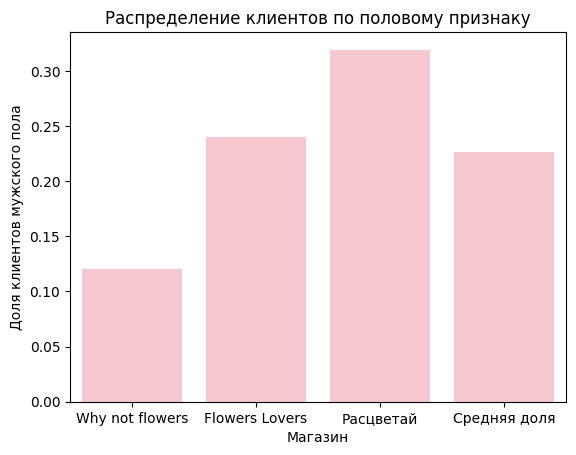

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Построение барплота распределения клиентов по половому признаку
shops = ["Why not flowers", "Flowers Lovers", "Расцветай", "Средняя доля"]
prop = [whynot_users.sexes()[2], lovers_users.sexes()[2], rascvetai_users.sexes()[2], (whynot_users.sexes()[2] + lovers_users.sexes()[2] + rascvetai_users.sexes()[2])/3]

graph_1 = pd.DataFrame([shops, prop], index=['Row 1', 'Row 2'])
graph_1

graph_1 = graph_1.T.reset_index()
graph_1.columns = ['Индекс', 'Магазин', 'Доля клиентов мужского пола']

sns.barplot(x='Магазин', y='Доля клиентов мужского пола', data=graph_1, color='pink')

plt.xlabel('Магазин')
plt.ylabel('Доля клиентов мужского пола')
plt.title('Распределение клиентов по половому признаку')
plt.show()


Выводы:

1.   Средняя доля потребителей-мужчин в цветочных магазинах - 0.23. Необходимо сделать поправку на среднюю частоту отзывов от мужчин и женщин.
2.


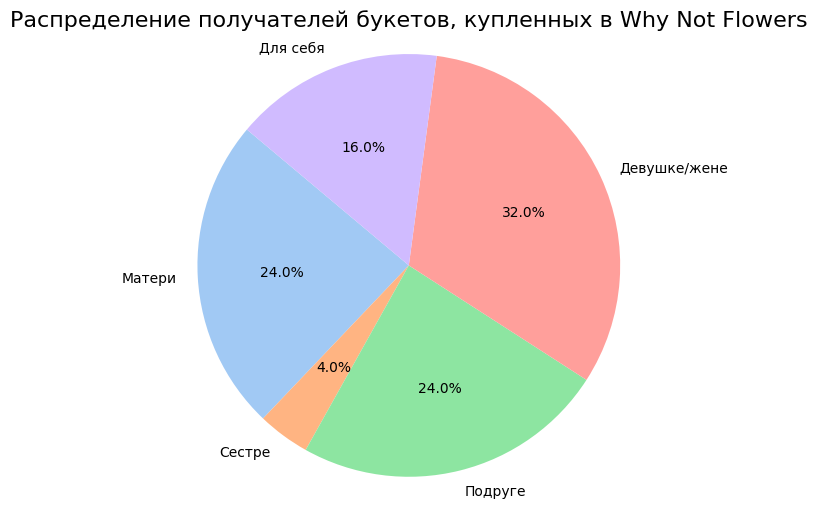

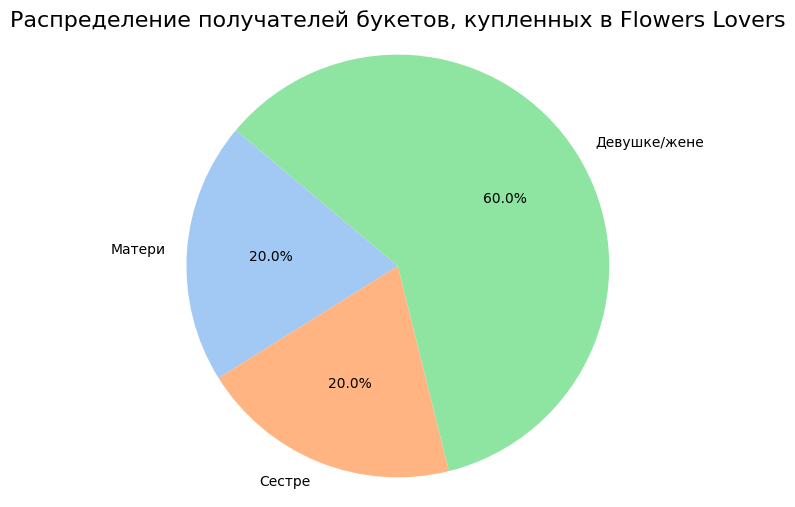

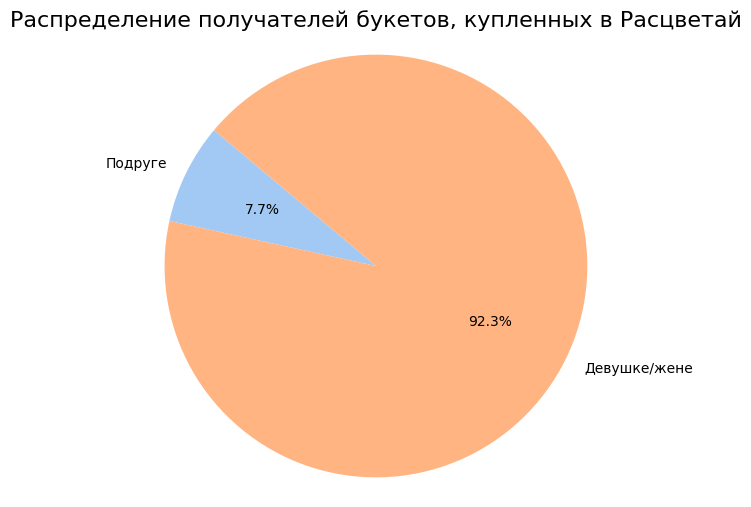

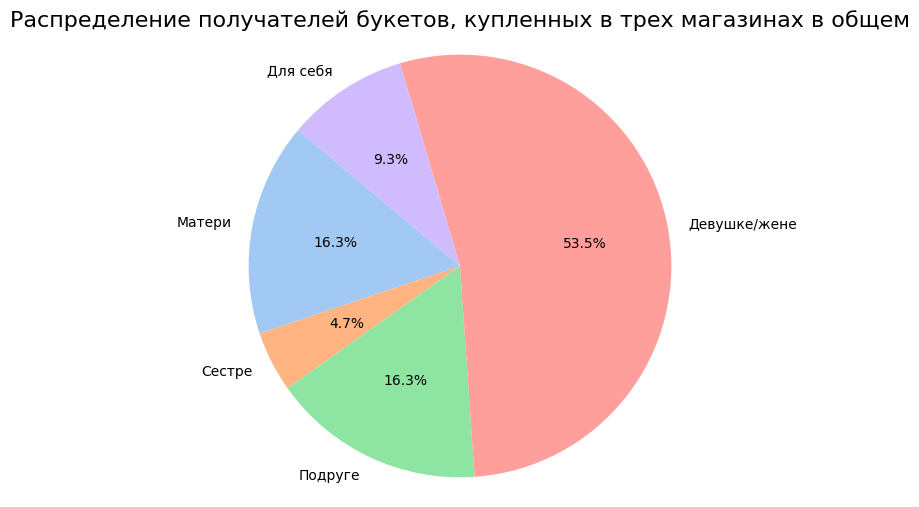

43

In [12]:
#Построение круговых диаграмм, отображающих наиболее популярных получателей букетов
#1, whynot_flowers
whynot_users.create_reciever_diagram()

#2, lovers_flowers
lovers_users.create_reciever_diagram()

#3, расцветай
rascvetai_users.create_reciever_diagram()

#общее
common_users.create_reciever_diagram()

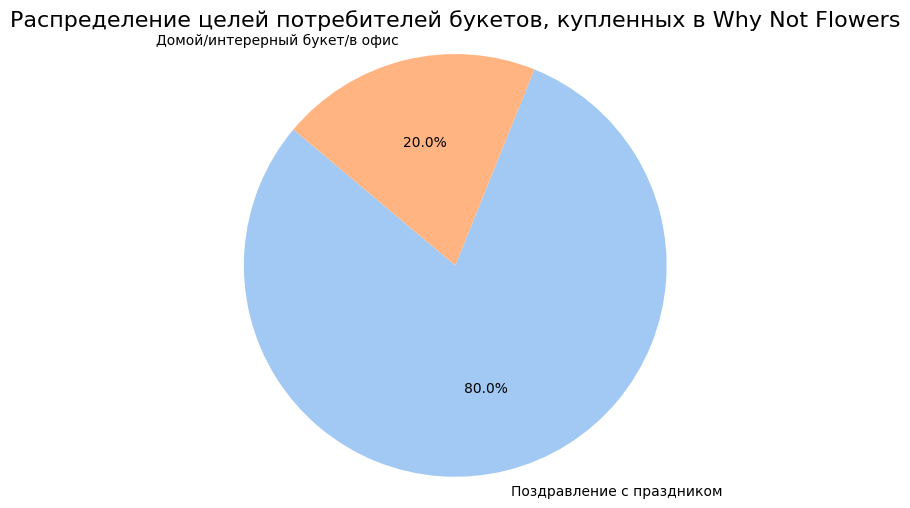

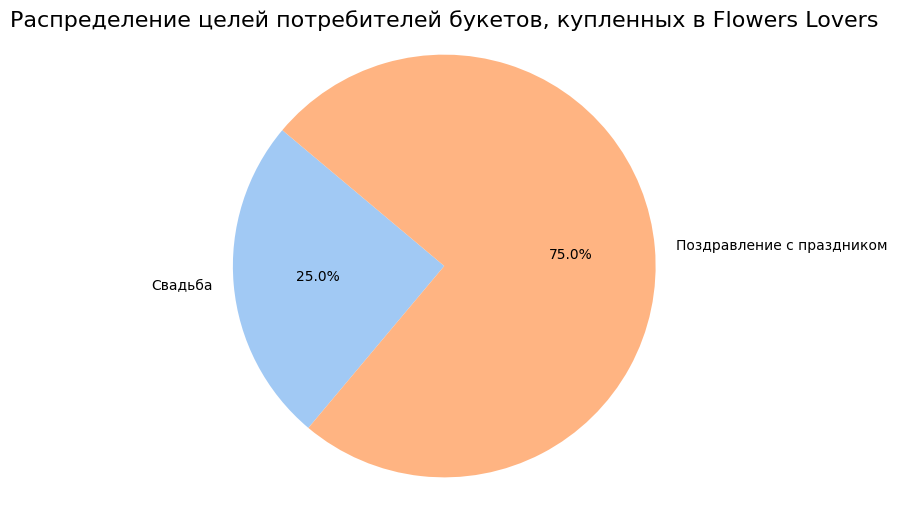

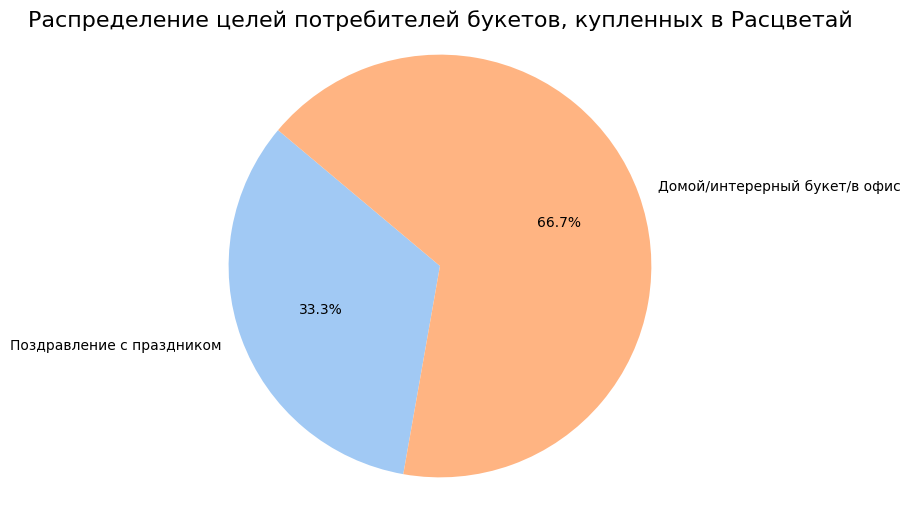

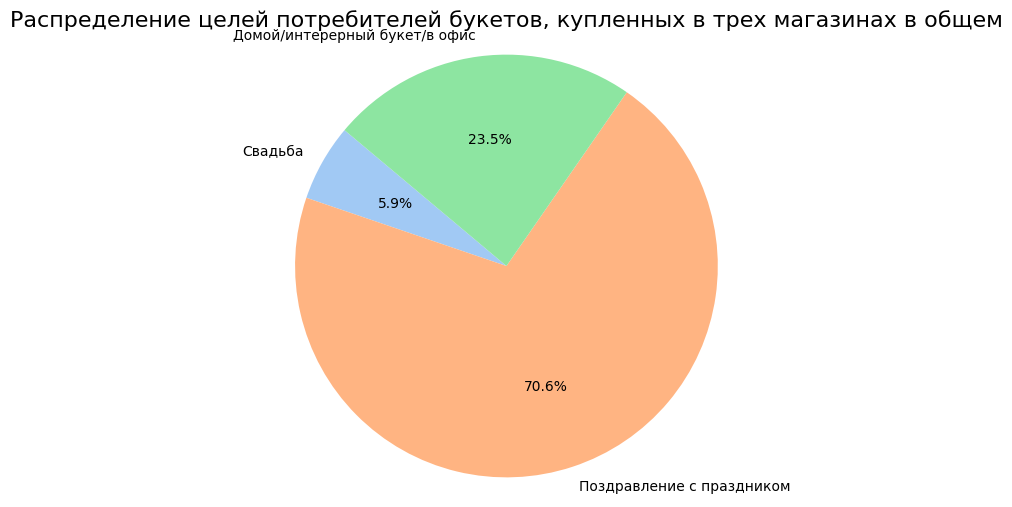

17

In [13]:
#Построение круговых диаграмм, отображающих наиболее популярные цели покупки цветов
#1, whynot_flowers
whynot_users.create_target_diagram()

#2, lovers_flowers
lovers_users.create_target_diagram()

#3, расцветай
rascvetai_users.create_target_diagram()

#общее
common_users.create_target_diagram()

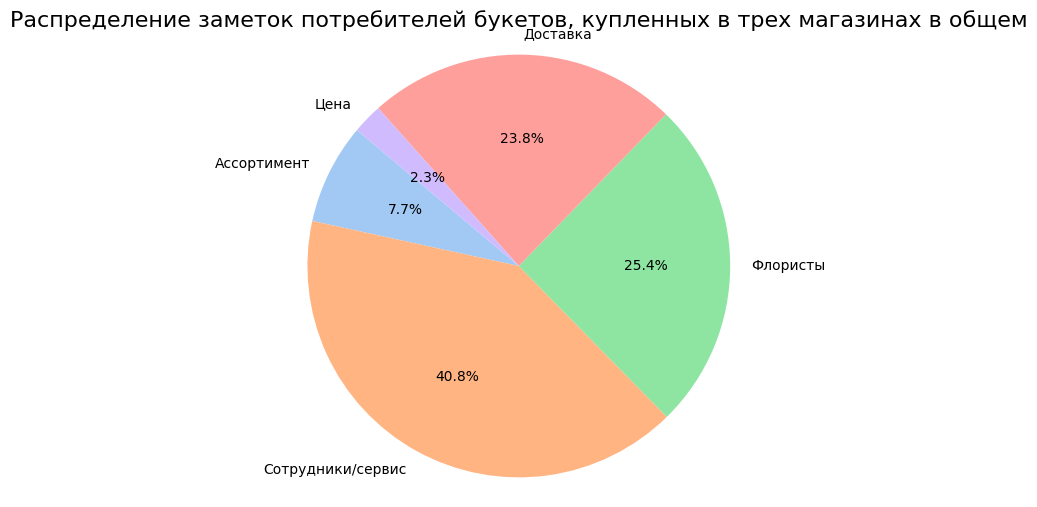

130

In [14]:
#Построение круговых диаграмм, отображающих наиболее популярные цели покупки цветов
#общее
common_users.create_notes_diagram()

Выводы:


1.   Покупатели часто упоминают сервис и обслуживание(40%)
2.  Покупатели примерно одинаковое количество раз обратили внимание на флористов и доставку(23 и 25%)
3.  Покупатели достаточно часто отмечают ассортимент товаров.



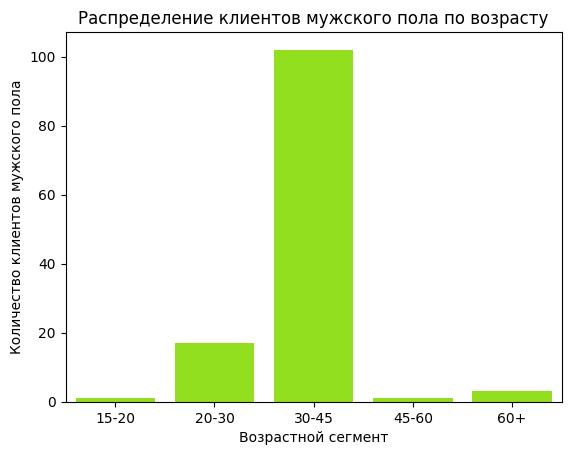

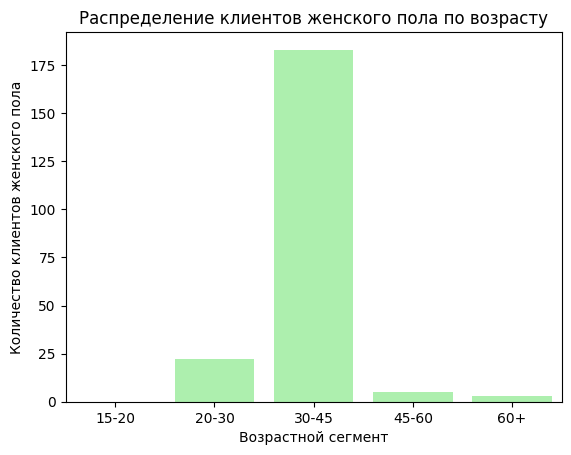

(   15-20  20-30  30-45  45-60  60+
 0      0     22    183      5    3,
    15-20  20-30  30-45  45-60  60+
 0      1     17    102      1    3)

In [44]:
#парсинг первой тысячи подписчиков сообщетства kapusta_flowers в вк
import requests
from datetime import datetime

SERVICE_TOKEN = "70a336c470a336c470a336c49c738e52ee770a370a336c4177ee5f6328ae245a2640a48"
GROUP_ID = "kapusta_flowers"
API_VERSION = "5.131"

def calculate_age(bdate):
    try:
        day, month, year = map(int, bdate.split('.'))
        today = datetime.now()
        age = today.year - year

        if (today.month, today.day) < (month, day):
            age -= 1
        return age
    except:
        return None

def get_members_with_ages():
        members_response = requests.get(
            "https://api.vk.com/method/groups.getMembers",
            params={
                "group_id": 'kapusta_flowers',
                "access_token": "70a336c470a336c470a336c49c738e52ee770a370a336c4177ee5f6328ae245a2640a48",
                "v": "5.131",
                "count": 1000,
                "fields": "sex,bdate"
            }
        )

        data = members_response.json()
        return data["response"]["items"]

members = get_members_with_ages()

def get_men(members):
    filtered_users_men = {"15-20": [0], "20-30": [0], "30-45": [0], "45-60":[0], "60+":[0]}
    for user in members:
        if user.get("sex") != 2:
           continue
        bdate = user.get("bdate", "")
        if len(bdate.split('.')) != 3:
            continue

        age = calculate_age(bdate)
        if age and 15 <= age <= 20:
            filtered_users_men["15-20"][0]+=1
        elif age and 20 <= age <= 30:
            filtered_users_men["20-30"][0] +=1
        elif age and 30 <= age <= 45:
            filtered_users_men["30-45"][0] +=1
        elif age and 45 <= age <= 60:
            filtered_users_men["45-60"][0] +=1
        else:
            filtered_users_men["60+"][0] +=1
    return filtered_users_men

def get_women(members):
    filtered_users_women = {"15-20": [0], "20-30": [0], "30-45": [0], "45-60":[0], "60+":[0]}
    for user in members:
        if user.get("sex") != 1:
           continue
        bdate = user.get("bdate", "")
        if len(bdate.split('.')) != 3:
            continue

        age = calculate_age(bdate)
        if age and 15 <= age <= 20:
            filtered_users_women["15-20"][0] +=1
        elif age and 20 <= age <= 30:
            filtered_users_women["20-30"][0] +=1
        elif age and 30 <= age <= 45:
            filtered_users_women["30-45"][0] +=1
        elif age and 45 <= age <= 60:
            filtered_users_women["45-60"][0]+=1
        else:
            filtered_users_women["60+"][0] +=1
    return filtered_users_women

overall_ta_men = pd.DataFrame(get_men(members))
overall_ta_women = pd.DataFrame(get_women(members))

ages_m = overall_ta_men.columns
people_m = overall_ta_men.iloc[0]
graph_4 = pd.DataFrame([ages_m, people_m], index=['Row 1', 'Row 2'])
graph_4

graph_4 = graph_4.T.reset_index()
graph_4.columns = ['Индекс', 'Возрастной сегмент', 'Количество клиентов мужского пола']

sns.barplot(x='Возрастной сегмент', y='Количество клиентов мужского пола', data=graph_4, color='#98FF00')

plt.xlabel('Возрастной сегмент')
plt.ylabel('Количество клиентов мужского пола')
plt.title('Распределение клиентов мужского пола по возрасту')
plt.show()
graph_4

ages_w = overall_ta_women.columns
people_w = overall_ta_women.iloc[0]
graph_5 = pd.DataFrame([ages_w, people_w], index=['Row 1', 'Row 2'])
graph_5

graph_5 = graph_5.T.reset_index()
graph_5.columns = ['Индекс', 'Возрастной сегмент', 'Количество клиентов женского пола']

sns.barplot(x='Возрастной сегмент', y='Количество клиентов женского пола', data=graph_5, color='#A2FAA3')

plt.xlabel('Возрастной сегмент')
plt.ylabel('Количество клиентов женского пола')
plt.title('Распределение клиентов женского пола по возрасту')
plt.show()

overall_ta_women, overall_ta_men

Выводы:
Среди всех подсписчиков указали полные даты рождения всего около 300 человек, из которых 213 женщины, 124 - мужчины. Итого женщины составляют примерно 63% подписчиков сообщества, мужчины - 37%. При этом основная масса подписчиков (85%) приходится на возрастной сегмент 30-45 лет. Значит, нашу целевую аудиторию должны составлять именно эти люди, и именно их потребности мы должны исследовать детальнее.


Выводы:

Основные сценарии покупки букета:
1.   Подарок на праздник - около 70 процентов, из которых более половины - девушке или жене. Самыми популярными праздниками, когда дарят цветы, являются День рождения и 8 Марта: 77% и 69% женщин соответственно получают или дарят букеты в эти дни. При этом монобукеты продаются почти в два раза активнее, чем авторские букеты: 55,6% против 25,1%. Тройка лидеров — розы, тюльпаны и пионы. Розы, хризантемы и герберы универсально удерживают спрос целый год. Важна доставка.

2.   Еще два популярных сюжета:

*   букет для себя - покупка связана с посещенем магазина оффлайн: тут потребитель ценит вежливость и профессионализм флористов, дизайн помещения, ассортимент, необычные сорты, чтобы 'глаза разбегались'
*  интерьерный букет: важные факторы - широкий ассортимент, интересные цветочные композиции

Итого:


1.   подарок на праздник(70)


*   Цветы: розы, тюльпаны, пионы
*   Вид букетов: моно
*   Повод: день рождения, 8 марта
*   Получатели: в основном - партнерши
*   Важные факторы: доставка, внешний вид цветов

2.   букет для себя/ интереьрный букет(23)

Сходства:

*   Цветы: особенные виды цветов, сезонные цветы
*   Получатели: заказчик

Различия:

*  букет для себя - посещение оффлайн, важные факторы:  вежливость флористов, дизайн помещения, атмосфера, ассортимент
*   интерьерный букет - важные факторы: профессионализм флористов, авторские композиции, ассортимент, возможно доставка

Ассортимент:

Москва, самые популярные виды букетов согласно данным 2023 года Flowwow
букет из 19 ирисов;
авторский букет с пионовидными розами;
букет из 7 кустовых пионовидных роз с эвкалиптом.

Итого: